In [1]:
import numpy
import math
from matplotlib import pyplot
# display figures in the Notebook
%matplotlib inline

# 1. Complex numbers in Python

In [2]:
3+2j

(3+2j)

In [3]:
a=3
b=3
z=a+b*1j
print('z=',z)
print('The type of the variable is', type(z))

z= (3+3j)
The type of the variable is <class 'complex'>


In [4]:
a=2.75
b=3.69
z1=a+b*1j
c=8.55
d=6.13
z2=c-d*1j
z=z1*z2
print('z=',z)

z= (46.1322+14.692000000000004j)


In [5]:
z=1.4*(numpy.e**5.32j)
print('z=',z)

z= (0.799270785858235-1.1494199453957457j)


In [6]:
z1=7.51-9.15*1j
z2=4.43+9.64*1j
z=z1/z2
print('z=',z)

z= (-0.4880897698448308-1.0033441577191493j)


# 2. Shapes created by the Joukowski transformation

In [7]:
#Start by writing a Python function
def get_function(x,y):
    z=x+y*1j
    xi=z+c**2/z
    return xi

In [8]:
c=1.0
N=100
theta = numpy.linspace(0, 2*numpy.pi, N)

#On the z-plane, place a circle with radius R1=1.5, c=1, centered at the origin
R1=1.5
a1,b1=0,0

In [9]:
def get_x_y(R,a,b,theta):
    x=a+R*numpy.cos(theta)
    y=b+R*numpy.sin(theta)
    return x,y

In [10]:
x1,y1=get_x_y(R1,a1,b1,theta)

In [11]:
xi_1 = get_function (x1,y1)

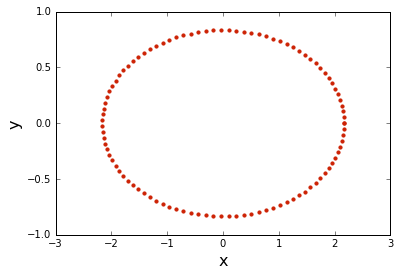

In [12]:
size = 10
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
x_start,x_end=-3.0,3.0
y_start,y_end=-1.0,1.0
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.scatter(xi_1.real, xi_1.imag,color='#CD2305', s=10, marker='o')

In [13]:
#place a circle on the z-plane with radius R=1.2,centered at (c−R,0)
R2=1.2
a2,b2=c-R2,0

In [14]:
x2,y2=get_x_y(R2,a2,b2,theta)

In [15]:
xi_2=get_function(x2,y2)

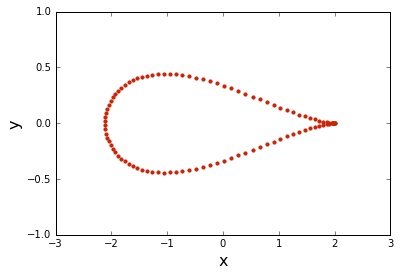

In [16]:
size = 10
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.scatter(xi_2.real, xi_2.imag,color='#CD2305', s=10, marker='o')

In [17]:
a3,b3=-0.1,0.1
R3=numpy.sqrt((c-a3)**2+b3**2)
x3,y3=get_x_y(R3,a3,b3,theta)
xi_3 = get_function(x3,y3)

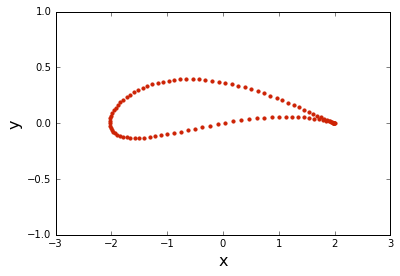

In [18]:
size = 10
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.scatter(xi_3.real, xi_3.imag,color='#CD2305', s=10, marker='o')

# 3. Grid points on the z -plane using polar coordinates

In [19]:
a,b=-0.15,0
R4=1.15
c=1
N_theta,N_r=145,100
theta=numpy.linspace(0, 2*numpy.pi, N_theta)
r=numpy.linspace(R4, 5, N_r)
RADIUS,THETA=numpy.meshgrid(r,theta)

In [20]:
def get_transformation(x,y):
    z=x+y*1j
    xi=z+c**2/z
    return xi

In [21]:
def get_x_y(R,a,b,theta):
    x=a+R*numpy.cos(theta)
    y=b+R*numpy.sin(theta)
    return x,y

In [22]:
X,Y=get_x_y(RADIUS,a,b,THETA)
XI=get_transformation(X,Y)

In [23]:
numpy.shape(X)

(145, 100)

In [24]:
numpy.shape(XI)

(145, 100)

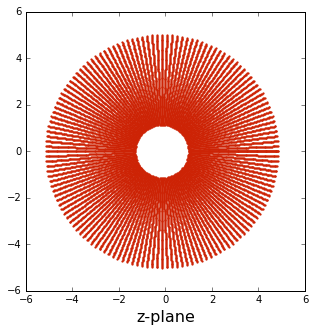

In [25]:
size=5
x_start,x_end=-6,6
y_start,y_end=-6,6
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('z-plane',fontsize=16)
pyplot.scatter(X,Y,color='#CD2305', s=5, marker='o',linewidth=0)

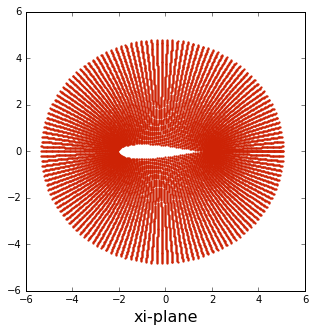

In [26]:
size=5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
x_start,x_end=-6,6
y_start,y_end=-6,6
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('xi-plane',fontsize=16)
pyplot.scatter(XI.real,XI.imag,color='#CD2305', s=5, marker='o',linewidth=0)

# 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

In [27]:
u_inf = 1.0
R1=1.15
kappa = R1**2*2*numpy.pi*u_inf
kappa

8.309512568745001

In [28]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [29]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, a, b, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, a, b, X, Y)

In [30]:
u_freestream = u_inf * numpy.ones((N_theta, N_r), dtype=float)
v_freestream = numpy.zeros((N_theta, N_r), dtype=float)

psi_freestream = u_inf * Y

In [31]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

In [32]:
numpy.shape(u)

(145, 100)

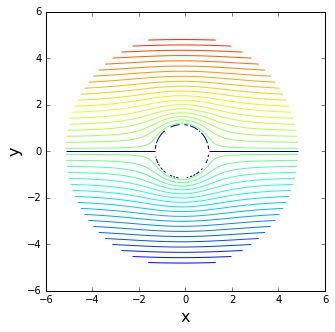

In [33]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X, Y,psi, levels=numpy.linspace(x_start,x_end,50),density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X,Y,psi,levels=[0.],density=2, linewidth=1, arrowsize=1, arrowstyle='->')

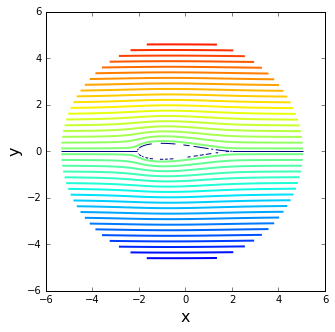

In [34]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(XI.real, XI.imag, psi, levels=numpy.linspace(x_start, x_end, 50), linewidths=2, linestyles='solid')
pyplot.contour(XI.real, XI.imag,psi, levels=[0.],density=2, linewidth=1, arrowsize=1, arrowstyle='->')

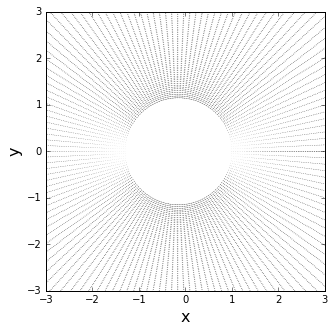

In [35]:
size = 5
x_start,x_end=-3,3
y_start,y_end=-3,3
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X,Y,u,v,units='xy',pivot='tip',width=0.005,scale=40)

In [36]:
def get_W(x,y,u,v):
    z=x+y*1j
    W=(u-v*1j)/(1-(c/z)**2)
    return W

In [37]:
W=get_W(X,Y,u,v)

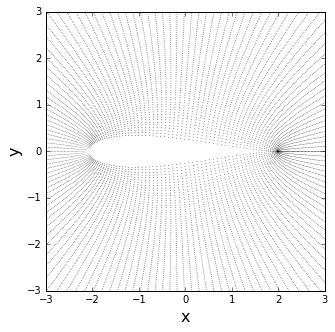

In [38]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(XI.real,XI.imag,W.real,W.imag,units='xy',pivot='tip',width=0.005,scale=40)

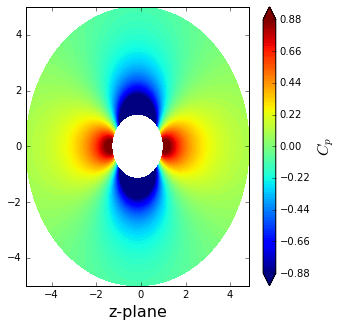

In [39]:
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('z-plane', fontsize=16)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88,-0.66,-0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

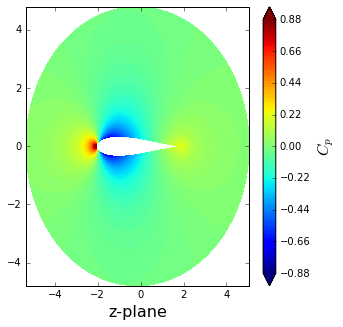

In [40]:
cp_xi=1.0-(W.real**2+W.imag**2)/u_inf**2

size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('z-plane', fontsize=16)
contf = pyplot.contourf(XI.real, XI.imag, cp_xi, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88,-0.66,-0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

In [41]:
kappa

8.309512568745001

In [42]:
W.real[61][0]

1.1063384662852436

In [43]:
W.imag[61][0]

-0.52363334929849692

In [44]:
numpy.min(cp_xi)

-0.68775567409240423

# 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation¶

In [45]:
AOA=20*numpy.pi/180
X1=(X-a)*numpy.cos(AOA)+(Y-b)*numpy.sin(AOA)
Y1=-(X-a)*numpy.sin(AOA)+(Y-b)*numpy.cos(AOA)

In [46]:
u_freestream = u_inf * numpy.ones((145, 100), dtype=float)
v_freestream = numpy.zeros((145, 100), dtype=float)
psi_freestream = u_inf * Y1

In [47]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, 0, 0, X1, Y1)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, 0, 0, X1, Y1)

In [48]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

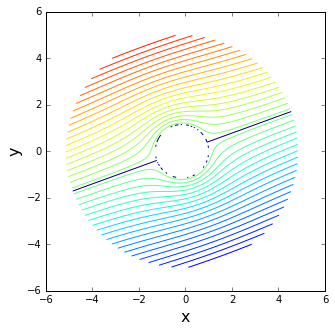

In [49]:
size = 5
x_start,x_end=-6,6
y_start,y_end=-6,6
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X, Y,psi,levels=numpy.linspace(x_start,x_end,50),density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X,Y,psi,levels=[0.],density=2, linewidth=1, arrowsize=1, arrowstyle='->')

In [50]:
def get_xi2(x,y):
    z=x+y*1j
    z1=(z-(a+b*1j))*numpy.exp(-1j*AOA)
    xi=z1+c**2/z1
    return xi

In [51]:
xi2=get_xi2(X1,Y1)

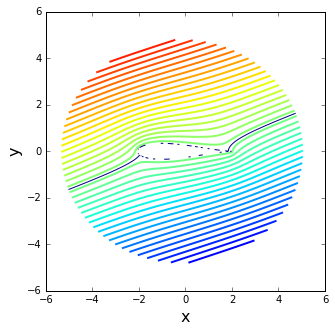

In [52]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(XI.real, XI.imag, psi, levels=numpy.linspace(x_start, x_end, 50), linewidths=2, linestyles='solid')
pyplot.contour(XI.real, XI.imag, psi, levels=[0.],density=2, linewidth=1, arrowsize=1, arrowstyle='->')

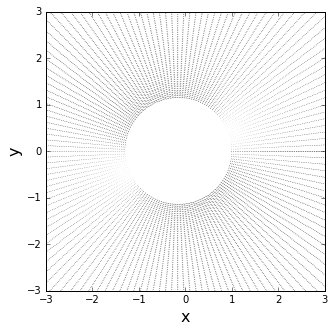

In [53]:
size = 5
x_start,x_end=-3,3
y_start,y_end=-3,3
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X,Y,u,v,units='xy',pivot='tip',width=0.005,scale=40)

In [54]:
def get_W2(x,y):
    z=x+y*1j
    W=(u-v*1j)*numpy.exp(-1j*AOA)/(1-(c/z)**2)
    return W

In [55]:
W=get_W2(X,Y)

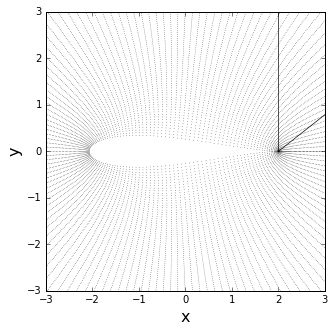

In [56]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(XI.real,XI.imag,W.real,W.imag)

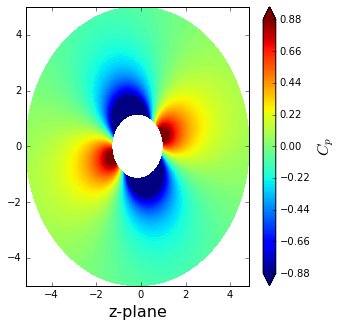

In [57]:
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('z-plane', fontsize=16)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88,-0.66,-0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

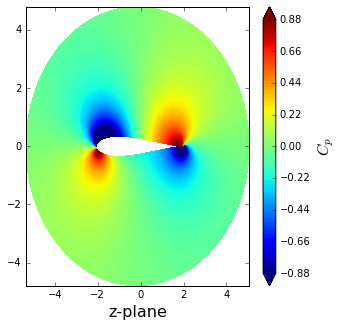

In [58]:
cp_xi=1.0-(W.real**2+W.imag**2)/u_inf**2

size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('z-plane', fontsize=16)
contf = pyplot.contourf(XI.real, XI.imag, cp_xi, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88,-0.66,-0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

In [59]:
W[49][0]

(1.4830654150147842-0.092075495007287816j)

In [60]:
cp_xi[74][0]

-0.48520991643725964

In [61]:
numpy.where(cp_xi==numpy.max(cp_xi))

(array([ 8, 80]), array([0, 0]))

Lift=0, drag=0

# 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

In [62]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [63]:
gamma = -1*4*math.pi*1.15*numpy.sin(-20*math.pi/180)
gamma

4.9426446603975842

In [64]:
u_vortex, v_vortex = get_velocity_vortex(gamma, 0, 0, X1, Y1)
psi_vortex = get_stream_function_vortex(gamma, 0, 0, X1, Y1)

In [65]:
u = u + u_vortex
v = v + v_vortex
psi = psi + psi_vortex

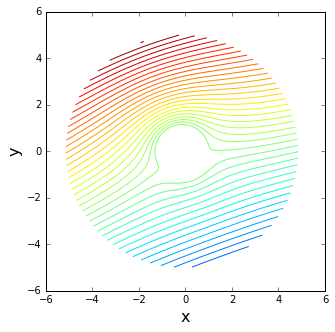

In [66]:
size = 5
x_start,x_end=-6,6
y_start,y_end=-6,6
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(X, Y,psi,levels=numpy.linspace(x_start,x_end,50),density=2, linewidth=1, arrowsize=1, arrowstyle='->')

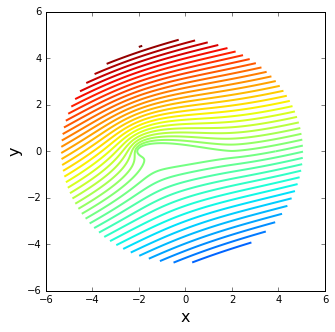

In [67]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(XI.real, XI.imag, psi, levels=numpy.linspace(x_start, x_end, 50), linewidths=2, linestyles='solid')

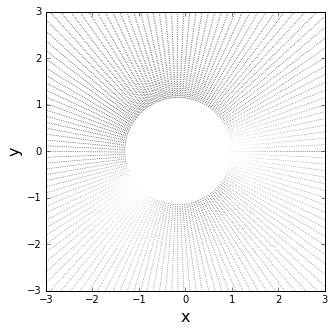

In [68]:
size = 5
x_start,x_end=-3,3
y_start,y_end=-3,3
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(X,Y,u,v,units='xy',pivot='tip',width=0.005,scale=40)

In [69]:
def get_W2(x,y,u,v):
    z=x+y*1j
    W=(u-v*1j)*numpy.exp(-1j*AOA)/(1-(c/z)**2)
    return W

In [70]:
W=get_W2(X,Y,u,v)

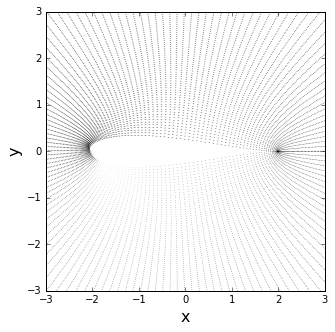

In [71]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.quiver(XI.real,XI.imag,W.real,W.imag,units='xy',pivot='tip',width=0.005,scale=40)

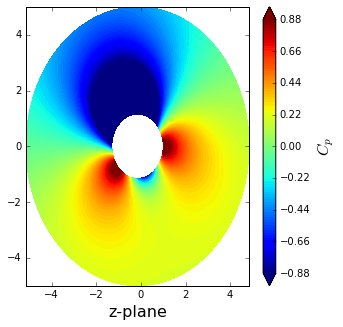

In [72]:
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('z-plane', fontsize=16)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88,-0.66,-0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

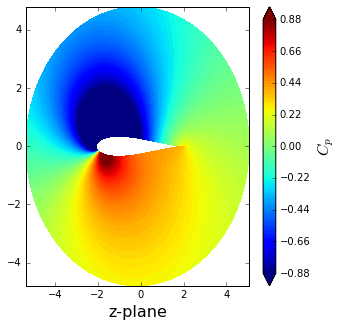

In [73]:
cp_xi=1.0-(W.real**2+W.imag**2)/u_inf**2

size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('z-plane', fontsize=16)
contf = pyplot.contourf(XI.real, XI.imag, cp_xi, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88,-0.66,-0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

In [74]:
gamma

4.9426446603975842

In [75]:
Lift = u_inf*numpy.cos(AOA)*gamma
Lift

4.6445667145424823

In [76]:
numpy.where(cp_xi==numpy.max(cp_xi))

(array([88]), array([0]))

In [77]:
W[91][0]

(0.20848311620747639+0.031988389195052501j)

In [78]:
cp_xi[110,0]

0.49669467238347376